In [1]:
# Import packages needed for the project

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import plotly.offline as pyoff
import plotly.graph_objs as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# matplotlib style & parameter changes
import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (16, 7)

In [2]:
df = pd.read_csv("Germany_Solar_Wind_Forecasting.csv", parse_dates=[0], index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25200 entries, 2014-12-31 23:00:00+00:00 to 2017-11-15 22:00:00+00:00
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cet_cest_timestamp                    25200 non-null  object 
 1   DE_load_actual_entsoe_transparency    25199 non-null  float64
 2   DE_load_forecast_entsoe_transparency  25199 non-null  float64
 3   DE_solar_capacity                     25200 non-null  int64  
 4   DE_solar_generation_actual            25096 non-null  float64
 5   DE_solar_profile                      25096 non-null  float64
 6   DE_wind_capacity                      25200 non-null  int64  
 7   DE_wind_generation_actual             25125 non-null  float64
 8   DE_wind_profile                       25125 non-null  float64
 9   DE_wind_offshore_capacity             25200 non-null  int64  
 10  DE_wind_offshore_generation_actual 

In [4]:
#display rows which have null values in "wind generation actual"
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248,NaN,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2016-05-31 21:00:00+00:00,2016-05-31T23:00:00+0200,49286.0,47884.0,38989,NaN,NaN,34217,NaN,NaN,2275,NaN,NaN,31942,NaN,NaN
2016-05-31 22:00:00+00:00,2016-06-01T00:00:00+0200,45570.0,44767.0,38991,NaN,NaN,34238,NaN,NaN,2275,NaN,NaN,31963,NaN,NaN
2016-05-31 23:00:00+00:00,2016-06-01T01:00:00+0200,43906.0,42865.0,38991,NaN,NaN,34238,NaN,NaN,2275,NaN,NaN,31963,NaN,NaN
2016-06-01 00:00:00+00:00,2016-06-01T02:00:00+0200,43059.0,41763.0,38991,NaN,NaN,34238,NaN,NaN,2275,NaN,NaN,31963,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 18:00:00+00:00,2016-12-09T19:00:00+0100,67805.0,68936.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN


In [5]:
df[df['DE_solar_generation_actual'].isna()]  #display rows which have null values in "solar generation actual"

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248,NaN,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,41151.0,39723.0,37248,NaN,NaN,27913,8852.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,40135.0,38813.0,37248,NaN,NaN,27913,9054.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,39106.0,38490.0,37248,NaN,NaN,27913,9070.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,38765.0,38644.0,37248,NaN,NaN,27913,9163.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 18:00:00+00:00,2016-12-09T19:00:00+0100,67805.0,68936.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN


In [6]:
df.isna().sum()   #75 null values for wind_gen_actual #104 null values for solar_gen_actual

,0
cet_cest_timestamp,0
DE_load_actual_entsoe_transparency,1
DE_load_forecast_entsoe_transparency,1
DE_solar_capacity,0
DE_solar_generation_actual,104
DE_solar_profile,104
DE_wind_capacity,0
DE_wind_generation_actual,75
DE_wind_profile,75
DE_wind_offshore_capacity,0


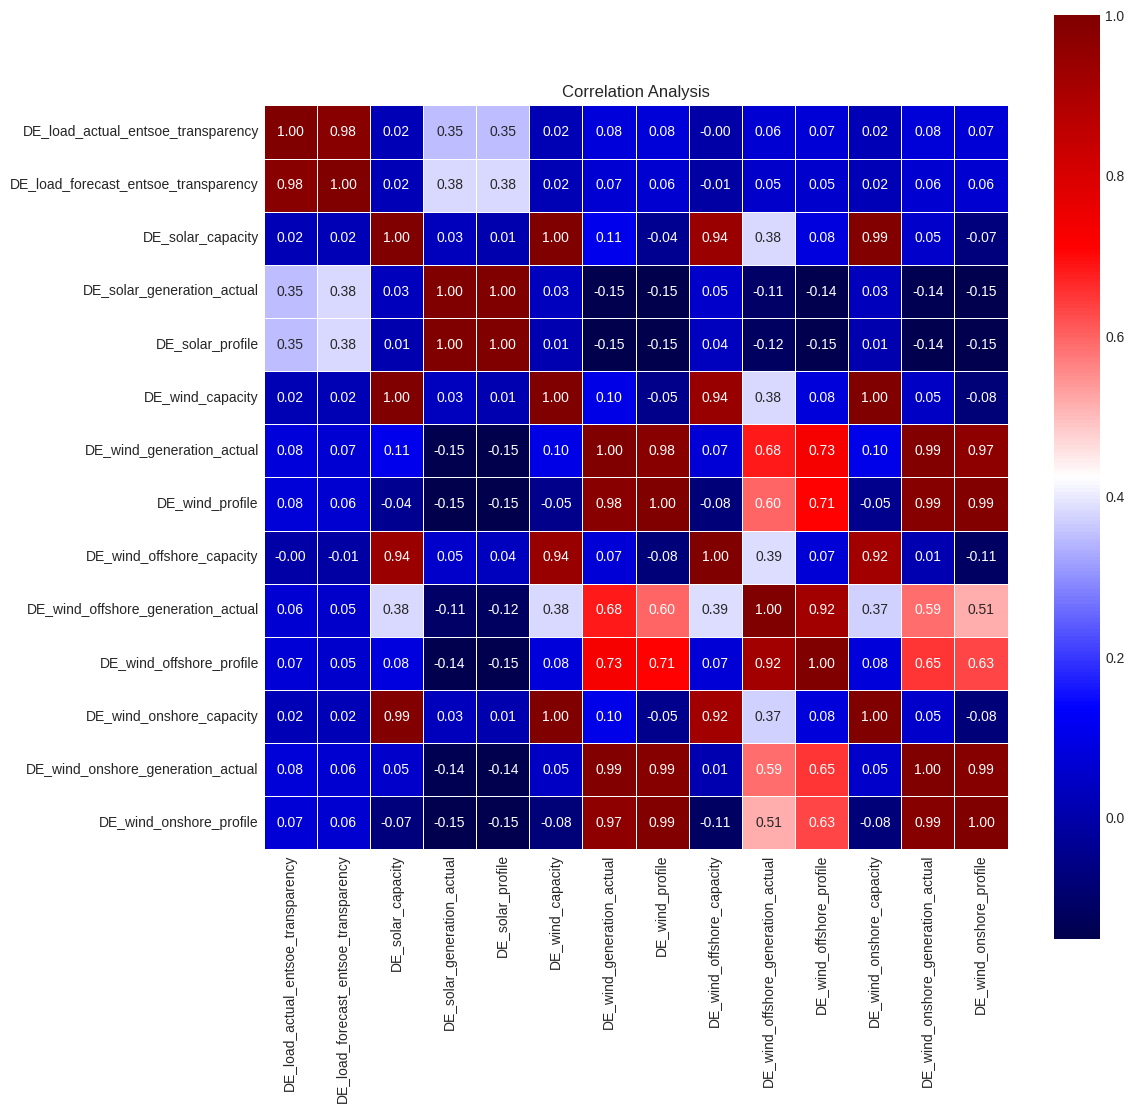

In [10]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Now plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=numeric_df.corr(),
            annot=True,
            annot_kws={"size": 10},
            square=True,
            cmap='seismic',
            fmt='.2f',
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.title('Correlation Analysis')
plt.show()


In [ ]:
nulls = df.isna().any(axis=1)
df.loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']]

#shift function to shift the index 24 hours

In [ ]:
df[df['DE_solar_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248,NaN,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248,NaN,NaN,27913,8852.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248,NaN,NaN,27913,9054.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248,NaN,NaN,27913,9070.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248,NaN,NaN,27913,9163.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248,NaN,NaN,27913,9231.0,0.3307,667,520.0,0.7790,27246,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248,NaN,NaN,27913,9689.0,0.3471,667,521.0,0.7815,27246,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248,NaN,NaN,27913,10331.0,0.3701,667,520.0,0.7801,27246,9811.0,0.3601


In [ ]:
#fill in the rest to zero because that is what they would be at those hours of night till 6 am
df['DE_solar_generation_actual'].fillna(0, inplace = True)
df['cet_cest_timestamp'].fillna(0, inplace = True)

In [ ]:
nulls =df.isna().any(axis=1)
df.loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']]


In [ ]:
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248,0.0,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248,0.0,NaN,27913,NaN,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248,0.0,NaN,27913,NaN,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248,0.0,NaN,27913,NaN,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248,0.0,NaN,27913,NaN,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248,0.0,NaN,27913,NaN,0.3307,667,520.0,0.7790,27246,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248,0.0,NaN,27913,NaN,0.3471,667,521.0,0.7815,27246,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248,0.0,NaN,27913,NaN,0.3701,667,520.0,0.7801,27246,9811.0,0.3601


In [ ]:
df['DE_wind_generation_actual'].mean()

9346.80823277231

In [ ]:
df['DE_wind_generation_actual'].fillna(11556, inplace=True)
df['cet_cest_timestamp'].fillna(0, inplace = True)

In [ ]:
df.isna().sum()

,0
cet_cest_timestamp,0
DE_load_actual_entsoe_transparency,1
DE_load_forecast_entsoe_transparency,1
DE_solar_capacity,0
DE_solar_generation_actual,0
DE_solar_profile,104
DE_wind_capacity,0
DE_wind_generation_actual,0
DE_wind_profile,75
DE_wind_offshore_capacity,0


In [ ]:
modified=df[['cet_cest_timestamp', 'DE_solar_generation_actual','DE_wind_generation_actual']]
modified

,cet_cest_timestamp,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,,
2014-12-31 23:00:00+00:00,0,0.0,11556.0
2015-01-01 00:00:00+00:00,0,0.0,11556.0
2015-01-01 01:00:00+00:00,0,0.0,11556.0
2015-01-01 02:00:00+00:00,0,0.0,11556.0
2015-01-01 03:00:00+00:00,0,0.0,11556.0
...,...,...,...
2017-11-15 18:00:00+00:00,2017-11-15T19:00:00+0100,0.0,1925.0
2017-11-15 19:00:00+00:00,2017-11-15T20:00:00+0100,0.0,1969.0
2017-11-15 20:00:00+00:00,2017-11-15T21:00:00+0100,0.0,2001.0


In [ ]:
# Drop the column becasue we do not need another time column
modified.drop(columns='cet_cest_timestamp',inplace=True)

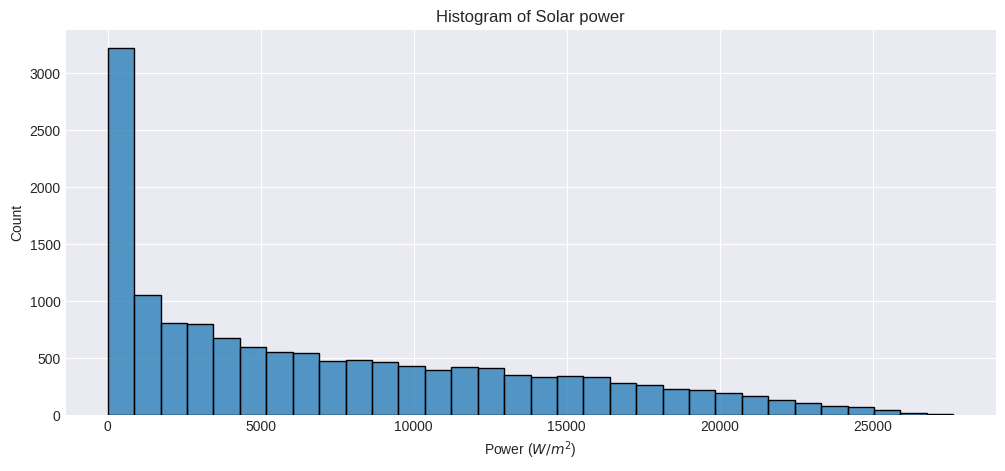

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['DE_solar_generation_actual'] != 0].DE_solar_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of Solar power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

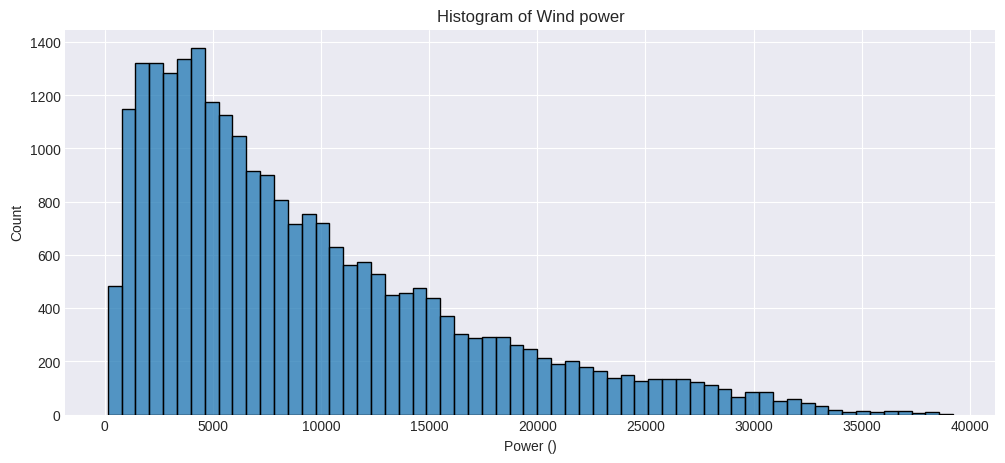

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['DE_wind_generation_actual'] != 0].DE_wind_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of Wind power')
plt.xlabel('Power ()')
plt.show()

In [ ]:
DE_energy = modified.reset_index()
DE_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   utc_timestamp               25200 non-null  datetime64[ns, UTC]
 1   DE_solar_generation_actual  25200 non-null  float64            
 2   DE_wind_generation_actual   25200 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 590.8 KB


In [ ]:
# create utc_timestamp as a column and another hour column
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))

DE_energy['utc_timestamp']=pd.to_datetime(DE_energy['utc_timestamp'])
DE_energy['hour'] = DE_energy['utc_timestamp'].dt.hour

In [ ]:
# use the resample function to average the generation over all the days
modified = modified.resample('D').mean()
modified

,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,
2014-12-31 00:00:00+00:00,0.000000,11556.000000
2015-01-01 00:00:00+00:00,712.416667,14194.458333
2015-01-02 00:00:00+00:00,323.208333,25148.083333
2015-01-03 00:00:00+00:00,301.541667,19289.791667
2015-01-04 00:00:00+00:00,832.583333,16042.625000
...,...,...
2017-11-11 00:00:00+00:00,756.791667,22121.708333
2017-11-12 00:00:00+00:00,655.458333,9809.333333
2017-11-13 00:00:00+00:00,1541.583333,8544.583333


In [ ]:
modified.shape

(1051, 2)

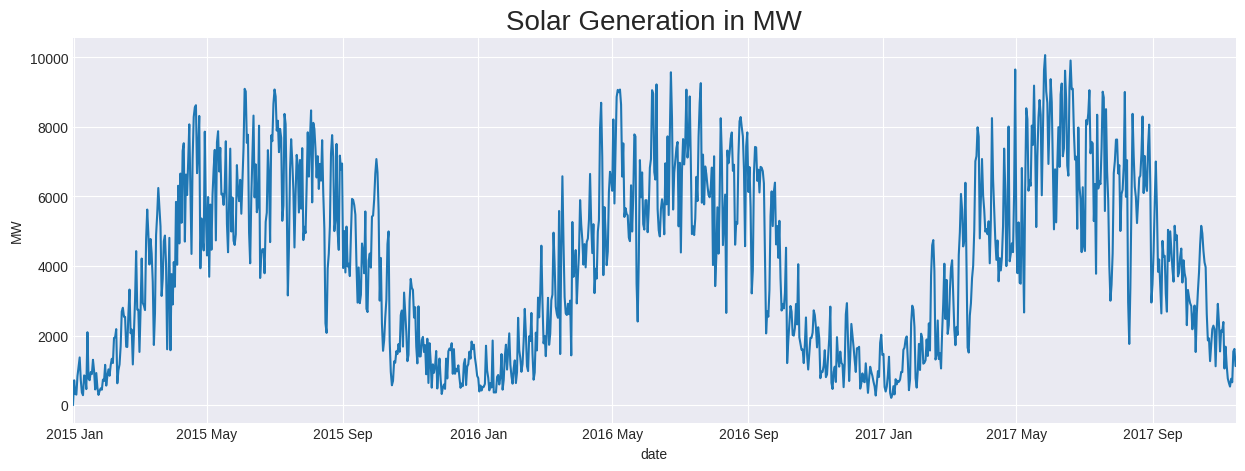

In [ ]:
# visualize the time time series of solar
plt.figure(figsize=(15,5))
plt.plot(modified['DE_solar_generation_actual'])
plt.title('Solar Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()


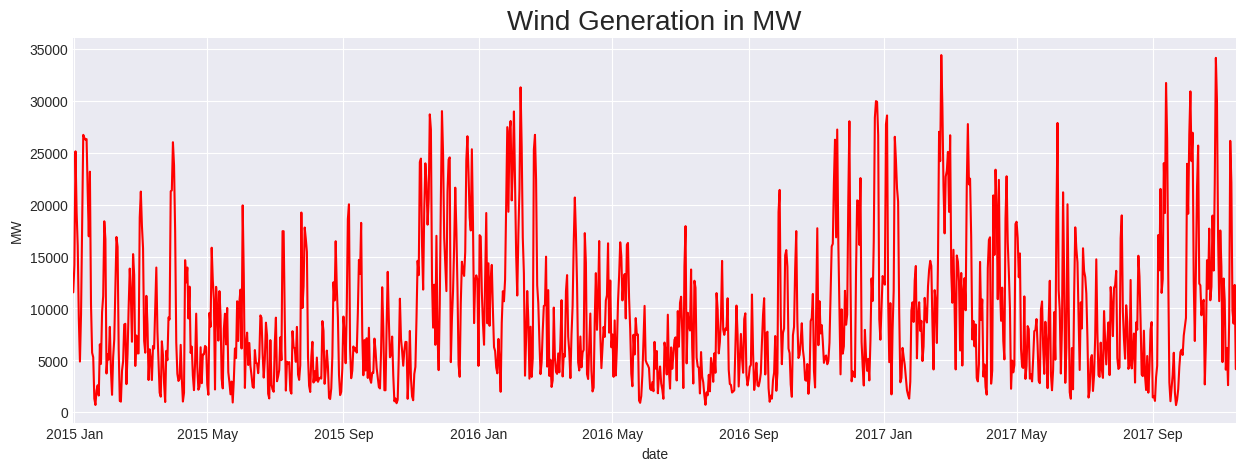

In [ ]:
# Do the same thing for the wind data
plt.figure(figsize=(15,5))
plt.plot(modified['DE_wind_generation_actual'], c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [ ]:
# Lets check out some basic statistics for the data
modified.describe()

,DE_solar_generation_actual,DE_wind_generation_actual
count,1051.000000,1051.000000
mean,4142.592369,9349.317403
std,2545.052276,6780.224436
min,0.000000,686.750000
25%,1728.416667,4107.312500
50%,4143.625000,7466.625000
75%,6222.229167,12728.875000
max,10065.833333,34428.041667


In [ ]:
df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,NaN,NaN,37248,0.0,NaN,27913,11556.0,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,0,41151.0,39723.0,37248,0.0,NaN,27913,11556.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,0,40135.0,38813.0,37248,0.0,NaN,27913,11556.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,0,39106.0,38490.0,37248,0.0,NaN,27913,11556.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,0,38765.0,38644.0,37248,0.0,NaN,27913,11556.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df


,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0.0,0.0,37248,0.0,0.0,27913,11556.0,0.0000,667,0.0,0.0000,27246,0.0,0.0000
2015-01-01 00:00:00+00:00,0,41151.0,39723.0,37248,0.0,0.0,27913,11556.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,0,40135.0,38813.0,37248,0.0,0.0,27913,11556.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,0,39106.0,38490.0,37248,0.0,0.0,27913,11556.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,0,38765.0,38644.0,37248,0.0,0.0,27913,11556.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-15 18:00:00+00:00,2017-11-15T19:00:00+0100,68415.0,68663.0,41520,0.0,0.0,41733,1925.0,0.0461,3320,59.0,0.0179,38413,1866.0,0.0486
2017-11-15 19:00:00+00:00,2017-11-15T20:00:00+0100,64384.0,64634.0,41520,0.0,0.0,41733,1969.0,0.0472,3320,111.0,0.0334,38413,1859.0,0.0484
2017-11-15 20:00:00+00:00,2017-11-15T21:00:00+0100,60605.0,61229.0,41520,0.0,0.0,41733,2001.0,0.0480,3320,187.0,0.0562,38413,1814.0,0.0472


#Train-Test Split

In [ ]:
df.dropna()
solar_x=df[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
solar_y=df['DE_solar_generation_actual']
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
# df_solar_y.fillna(0,inplace=True)
solar_x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25200 entries, 2014-12-31 23:00:00+00:00 to 2017-11-15 22:00:00+00:00
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DE_load_actual_entsoe_transparency    25200 non-null  float64
 1   DE_load_forecast_entsoe_transparency  25200 non-null  float64
 2   DE_solar_profile                      25200 non-null  float64
dtypes: float64(3)
memory usage: 787.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(solar_x,solar_y,test_size = 0.2, random_state = None)

In [ ]:
X1_test

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_profile
utc_timestamp,,,
2016-03-15 16:00:00+00:00,66816.0,64457.0,0.0180
2017-03-10 11:00:00+00:00,68589.0,68834.0,0.3922
2015-12-17 07:00:00+00:00,68488.0,67557.0,0.0026
2017-07-22 15:00:00+00:00,51155.0,50452.0,0.2515
2017-11-07 18:00:00+00:00,69428.0,65361.0,0.0000
...,...,...,...
2016-05-13 04:00:00+00:00,55207.0,51968.0,0.0234
2017-04-25 01:00:00+00:00,45702.0,42828.0,0.0000
2015-03-05 04:00:00+00:00,55233.0,51488.0,0.0000


In [ ]:
wind_x=df[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
wind_y=df['DE_wind_generation_actual']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(wind_x, wind_y, test_size = 0.2, random_state = None)

In [ ]:
X2_train

,DE_wind_capacity,DE_wind_profile,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,
2015-09-12 11:00:00+00:00,30915,0.1710,1269.0,0.5963,4018.0,0.1396
2016-09-27 09:00:00+00:00,35651,0.0252,709.0,0.2886,188.0,0.0057
2016-02-27 17:00:00+00:00,33162,0.2025,19.0,0.0088,6696.0,0.2162
2016-11-08 05:00:00+00:00,36072,0.1197,962.0,0.3812,3357.0,0.1001
2016-06-28 21:00:00+00:00,34653,0.1992,1407.0,0.6133,5495.0,0.1698
...,...,...,...,...,...,...
2015-10-17 17:00:00+00:00,31297,0.0270,373.0,0.1728,471.0,0.0162
2017-02-26 19:00:00+00:00,37793,0.5349,3899.0,1.4331,16313.0,0.4652
2015-05-02 01:00:00+00:00,29263,0.0492,178.0,0.1318,1262.0,0.0452


In [ ]:
df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0.0,0.0,37248,0.0,0.0,27913,11556.0,0.0000,667,0.0,0.0000,27246,0.0,0.0000
2015-01-01 00:00:00+00:00,0,41151.0,39723.0,37248,0.0,0.0,27913,11556.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,0,40135.0,38813.0,37248,0.0,0.0,27913,11556.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,0,39106.0,38490.0,37248,0.0,0.0,27913,11556.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,0,38765.0,38644.0,37248,0.0,0.0,27913,11556.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172


#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Train the model
# Solar Energy
lasso = Lasso(alpha = 1)
lasso.fit(X1_train, y1_train)
y1_pred = lasso.predict(X1_test)

In [ ]:
#Wind energy
lasso = Lasso(alpha = 1)
lasso.fit(X2_train, y2_train)
y2_pred = lasso.predict(X2_test)

In [ ]:
#alpha = 1
from sklearn.metrics import mean_squared_error
print("Solar mean_squared_error = ",mean_squared_error(y1_test,y1_pred))

from sklearn.metrics import mean_absolute_error
print("Solar mean_absolute_error = ",mean_absolute_error(y1_test,y1_pred))

from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("R2_score = ",r2_solar)

print()

print("mean_squared_error = ",mean_squared_error(y2_test,y2_pred))
print("mean_absolute_error = ",mean_absolute_error(y2_test,y2_pred))
r2_wind = r2_score(y2_test,y2_pred)
print("R2_score = ",r2_wind)

Solar mean_squared_error =  212533.65741680076
Solar mean_absolute_error =  140.90750878310956
R2_score =  0.9945718549593418

mean_squared_error =  1074657.0803402863
mean_absolute_error =  106.66700085737264
R2_score =  0.9799834776222338


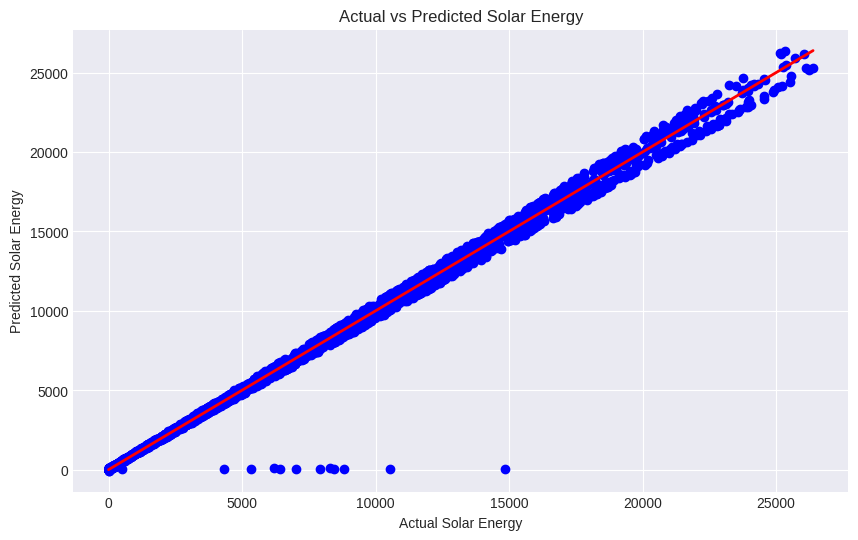

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, color='blue')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linewidth=2)
plt.xlabel('Actual Solar Energy')
plt.ylabel('Predicted Solar Energy')
plt.title('Actual vs Predicted Solar Energy')
plt.show()


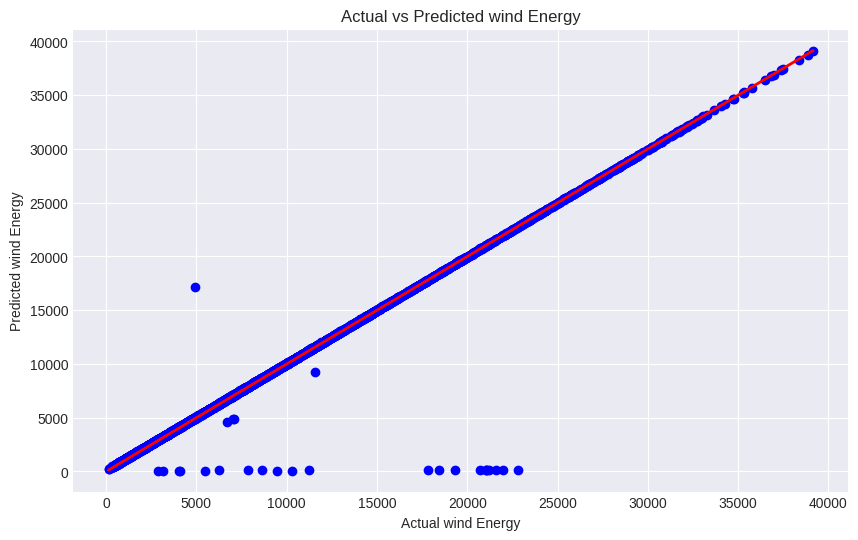

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linewidth=2)
plt.xlabel('Actual wind Energy')
plt.ylabel('Predicted wind Energy')
plt.title('Actual vs Predicted wind Energy')
plt.show()


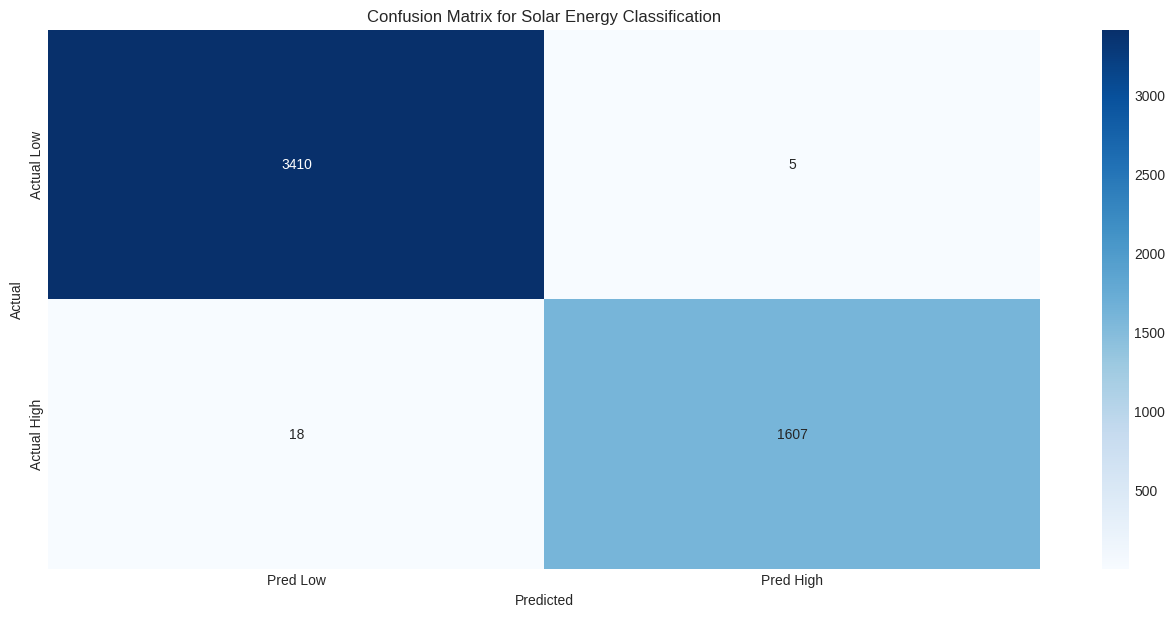

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = y1_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y1_test_class = np.where(y1_test >= threshold, 1, 0)
y1_pred_class = np.where(y1_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y1_test_class, y1_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Solar Energy Classification')
plt.show()

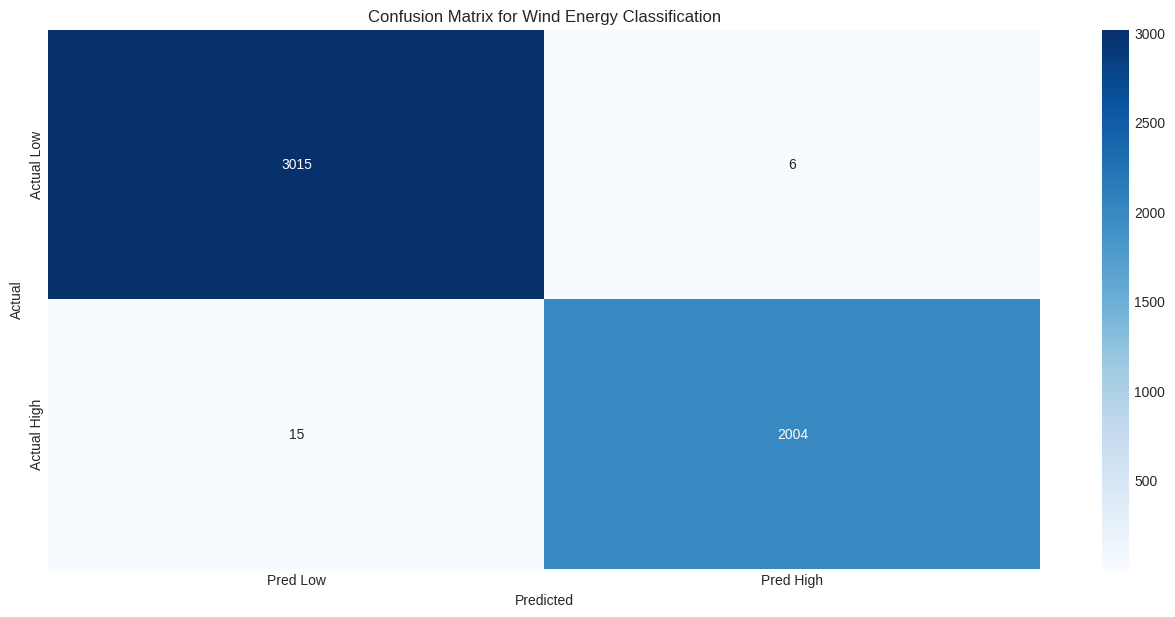

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = y2_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y2_test_class = np.where(y2_test >= threshold, 1, 0)
y2_pred_class = np.where(y2_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y2_test_class, y2_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Wind Energy Classification')
plt.show()


#Ridge Regression

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df['DE_solar_profile'], df['DE_solar_generation_actual'],test_size = 0.2, random_state = None)


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df['DE_wind_profile'], df['DE_wind_generation_actual'],test_size = 0.2, random_state = None)


In [ ]:
X1_train=np.array(X1_train).reshape(-1,1)
X1_test=np.array(X1_test).reshape(-1,1)
X2_train=np.array(X2_train).reshape(-1,1)
X2_test=np.array(X2_test).reshape(-1,1)

In [ ]:
from sklearn.linear_model import Ridge

# Train the model
ridgeSolar = Ridge(alpha = 1)
ridgeSolar.fit(X1_train, y1_train)
y1_pred = ridgeSolar.predict(X1_test)

In [ ]:
ridgeWind = Ridge(alpha = 1)
ridgeWind.fit(X2_train, y2_train)
y2_pred = ridgeSolar.predict(X2_test)

In [ ]:
#Hyperparameter tuning - alpha = 2
ridgeSolar = Ridge(alpha = 2)
ridgeSolar.fit(X1_train, y1_train)
y1_pred2 = ridgeSolar.predict(X1_test)

In [ ]:
ridgeWind = Ridge(alpha = 2)
ridgeWind.fit(X2_train, y2_train)
y2_pred2 = ridgeSolar.predict(X2_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error = ",mean_squared_error(y1_test,y1_pred))

from sklearn.metrics import mean_absolute_error
print("mean_absolute_error = ",mean_absolute_error(y1_test,y1_pred))

from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("R2_score = ",r2_solar)

print()

print("mean_squared_error = ",mean_squared_error(y2_test,y2_pred))
print("mean_absolute_error = ",mean_absolute_error(y2_test,y2_pred))
r2_wind = r2_score(y2_test,y2_pred)
print("R2_score = ",r2_wind)

mean_squared_error =  129729.81728964481
mean_absolute_error =  132.91563913979917
R2_score =  0.9966715824677908

mean_squared_error =  5943272.824246602
mean_absolute_error =  1504.5817425576251
R2_score =  0.8942957493106475


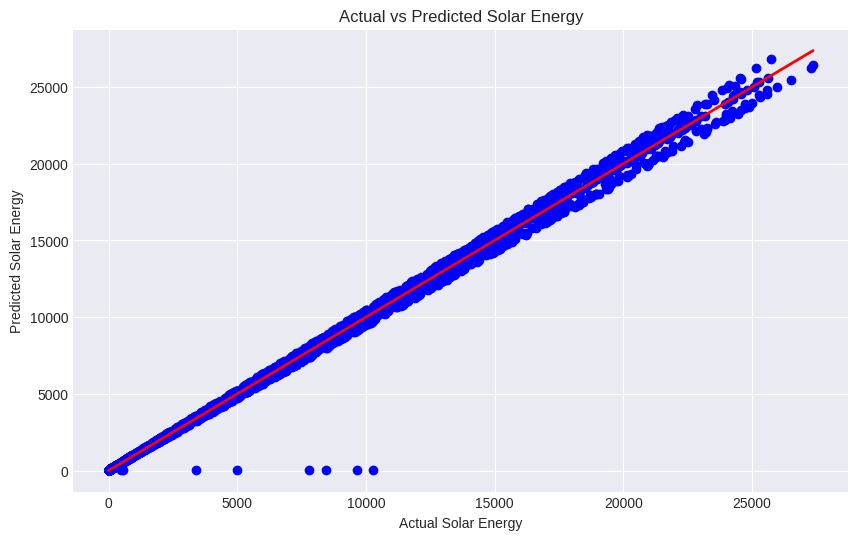

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, color='blue')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linewidth=2)
plt.xlabel('Actual Solar Energy')
plt.ylabel('Predicted Solar Energy')
plt.title('Actual vs Predicted Solar Energy')
plt.show()


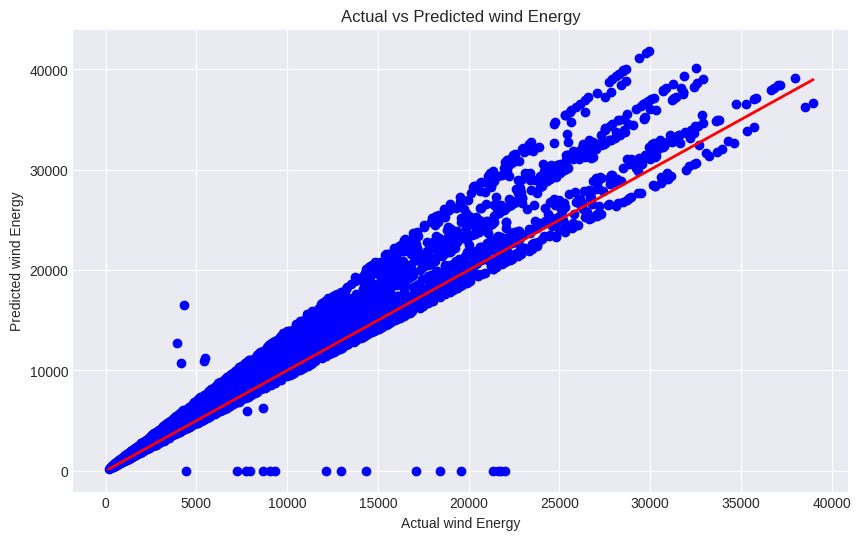

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linewidth=2)
plt.xlabel('Actual wind Energy')
plt.ylabel('Predicted wind Energy')
plt.title('Actual vs Predicted wind Energy')
plt.show()


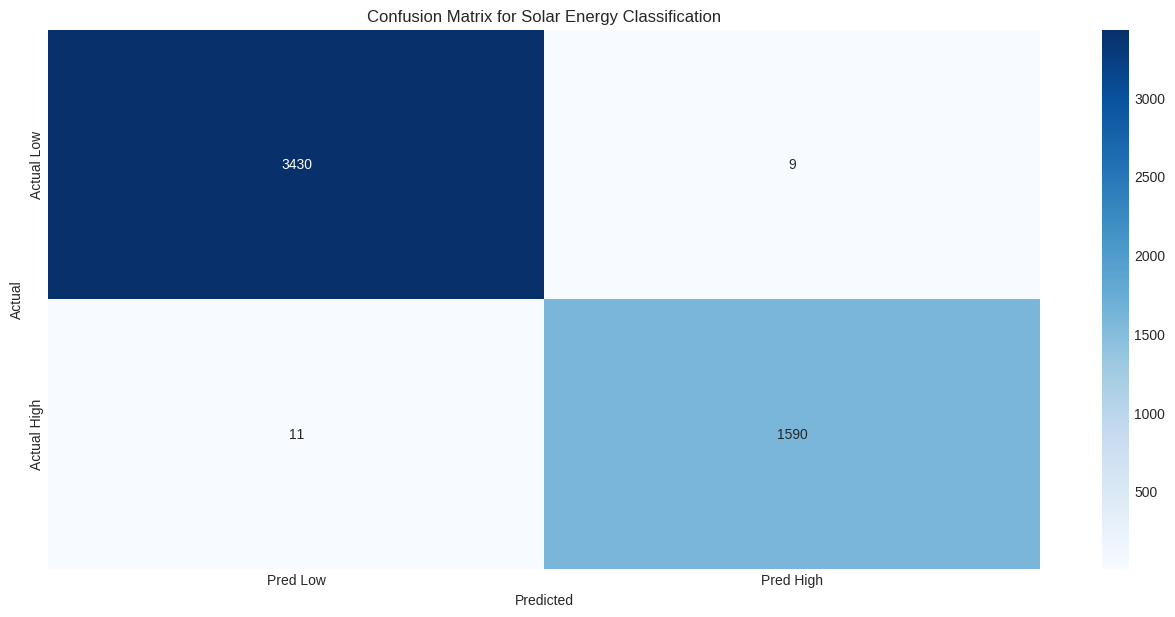

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = y1_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y1_test_class = np.where(y1_test >= threshold, 1, 0)
y1_pred_class = np.where(y1_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y1_test_class, y1_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Solar Energy Classification')
plt.show()


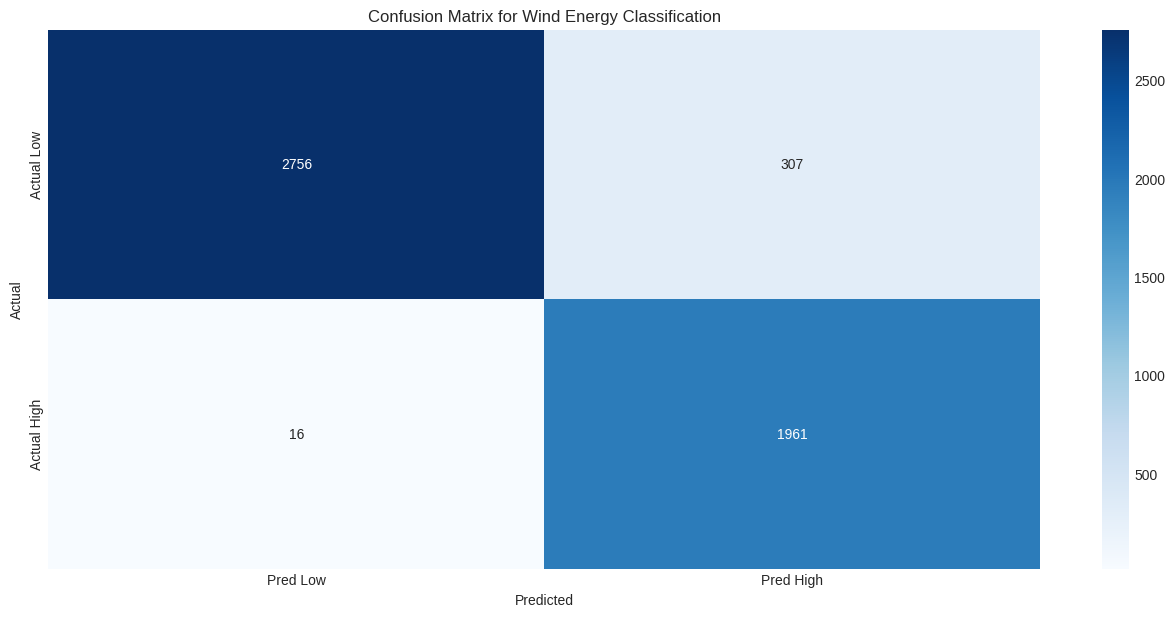

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = y2_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y2_test_class = np.where(y2_test >= threshold, 1, 0)
y2_pred_class = np.where(y2_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y2_test_class, y2_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Wind Energy Classification')
plt.show()


#Dession Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y1_pred = regressor.predict(X1_test)

# print the predicted price
y1_test


,DE_solar_generation_actual
utc_timestamp,
2017-08-05 09:00:00+00:00,17145.0
2016-08-26 08:00:00+00:00,19178.0
2016-04-14 08:00:00+00:00,11562.0
2015-08-30 19:00:00+00:00,0.0
2016-11-18 00:00:00+00:00,0.0
...,...
2015-11-20 23:00:00+00:00,0.0
2016-11-24 06:00:00+00:00,15.0
2017-08-16 23:00:00+00:00,0.0


In [ ]:
y1_pred

array([17195.        , 18457.        , 11703.66666667, ...,
          28.21680155,    28.21680155,    28.21680155])

In [ ]:
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y2_pred = regressor.predict(X2_test)

# print the predicted price
y2_testy2_pred = regressor.predict(X2_test)

# print the predicted price
y2_test

,DE_wind_generation_actual
utc_timestamp,
2015-09-15 03:00:00+00:00,14731.0
2017-05-16 15:00:00+00:00,4103.0
2015-12-01 17:00:00+00:00,11607.0
2016-04-22 00:00:00+00:00,9432.0
2017-02-27 07:00:00+00:00,19861.0
...,...
2015-12-24 02:00:00+00:00,12328.0
2016-10-19 08:00:00+00:00,7476.0
2016-05-15 21:00:00+00:00,13078.0


In [ ]:
y2_pred

array([17214.        ,  3191.        , 13579.25      , ...,
       13161.33333333, 12009.        , 26710.        ])

In [ ]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error = ",mean_squared_error(y1_test,y1_pred))

from sklearn.metrics import mean_absolute_error
print("mean_absolute_error = ",mean_absolute_error(y1_test,y1_pred))

from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("R2_score = ",r2_solar)

print()

print("mean_squared_error = ",mean_squared_error(y2_test,y2_pred))
print("mean_absolute_error = ",mean_absolute_error(y2_test,y2_pred))
r2_wind = r2_score(y2_test,y2_pred)
print("R2_score = ",r2_wind)

mean_squared_error =  176035.38110400553
mean_absolute_error =  161.14276375189013
R2_score =  0.9954835421725173

mean_squared_error =  3623674.0819402053
mean_absolute_error =  1151.6784651919493
R2_score =  0.935551039822495


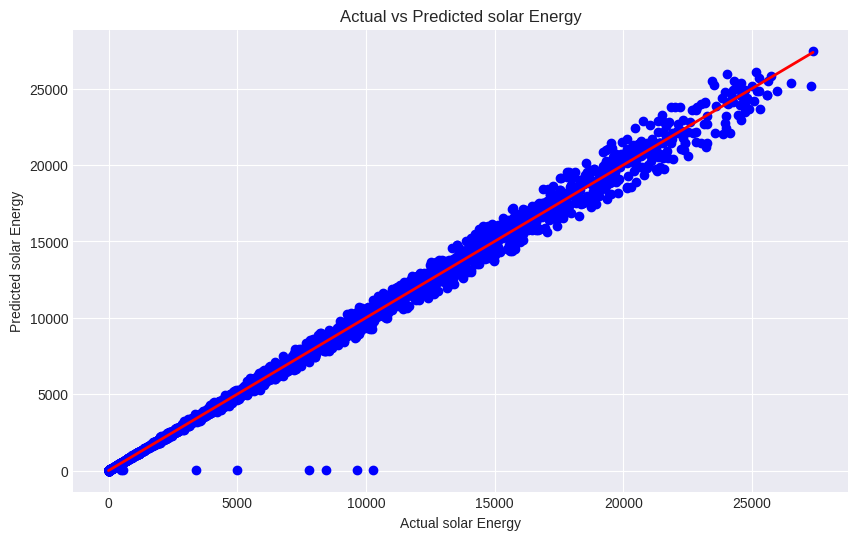

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, color='blue')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linewidth=2)
plt.xlabel('Actual solar Energy')
plt.ylabel('Predicted solar Energy')
plt.title('Actual vs Predicted solar Energy')
plt.show()


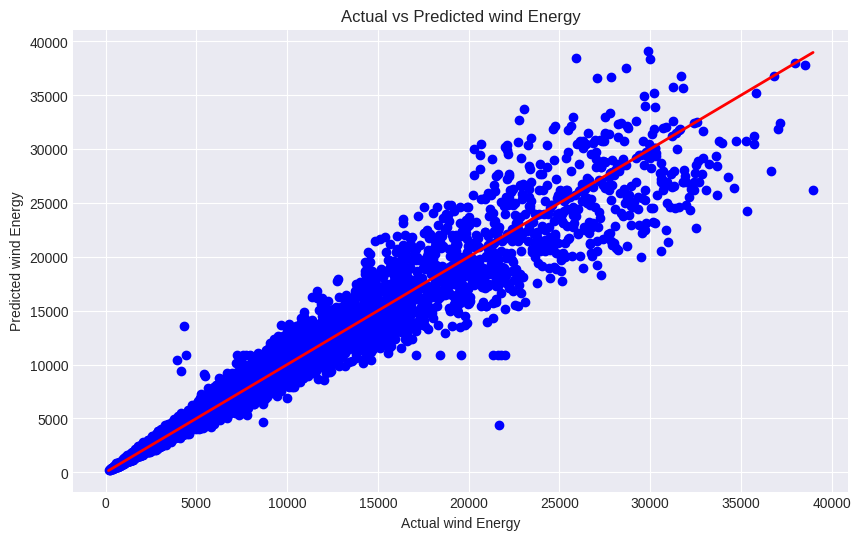

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linewidth=2)
plt.xlabel('Actual wind Energy')
plt.ylabel('Predicted wind Energy')
plt.title('Actual vs Predicted wind Energy')
plt.show()


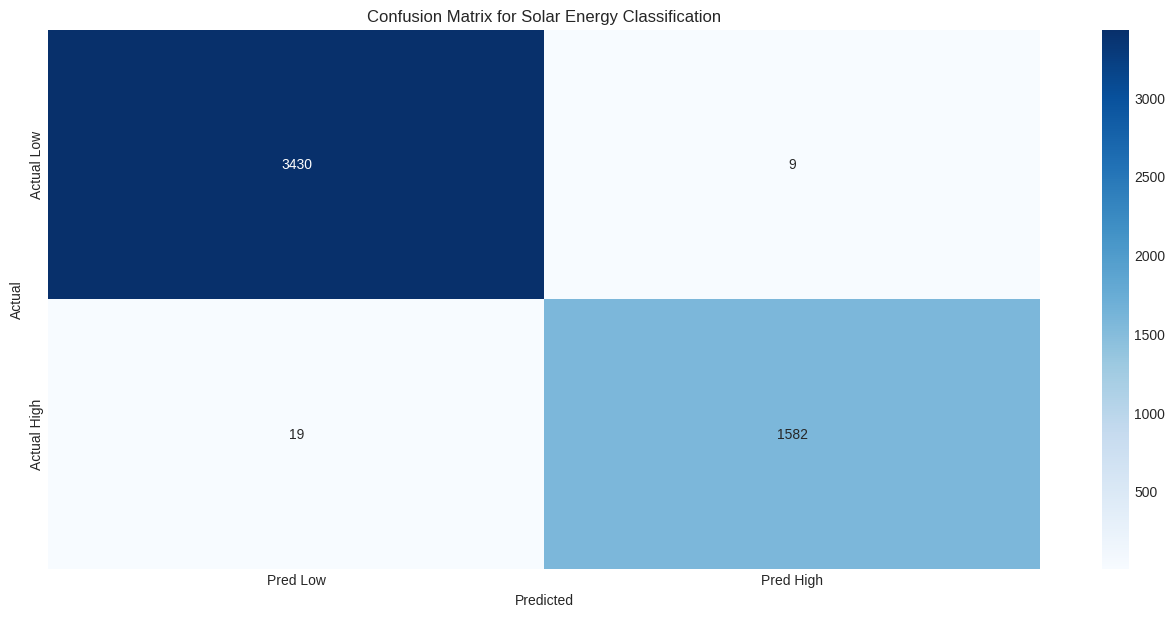

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = y1_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y1_test_class = np.where(y1_test >= threshold, 1, 0)
y1_pred_class = np.where(y1_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y1_test_class, y1_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Solar Energy Classification')
plt.show()


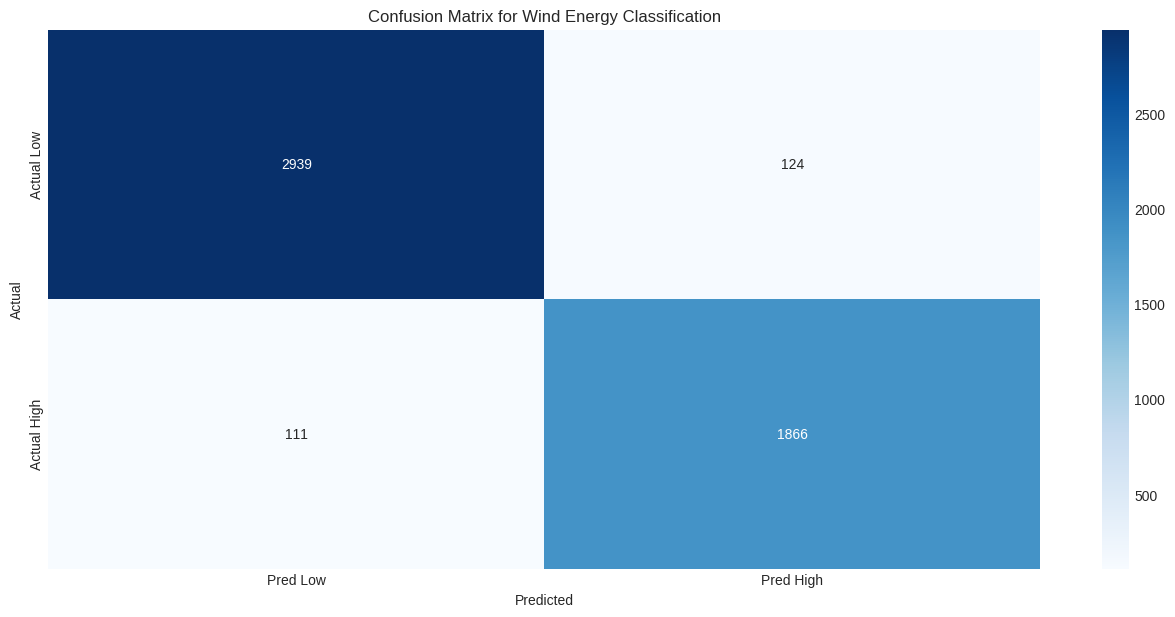

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = y2_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y2_test_class = np.where(y2_test >= threshold, 1, 0)
y2_pred_class = np.where(y2_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y2_test_class, y2_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Wind Energy Classification')
plt.show()


#Random Forest

In [ ]:
df.dropna()
df_solar_x=df[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
# df_solar_y.fillna(0,inplace=True)
df_solar_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DE_load_actual_entsoe_transparency    25200 non-null  float64
 1   DE_load_forecast_entsoe_transparency  25200 non-null  float64
 2   DE_solar_profile                      25200 non-null  float64
dtypes: float64(3)
memory usage: 590.8 KB


In [ ]:
df_solar_x.isna().sum()

,0
DE_load_actual_entsoe_transparency,0
DE_load_forecast_entsoe_transparency,0
DE_solar_profile,0


In [ ]:
from sklearn.model_selection import train_test_split
solar_x_train, solar_x_test,solar_y_train,solar_y_test = train_test_split(df_solar_x,df_solar_y,test_size = 0.2, random_state = None)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = solar_x_train

target = solar_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(solar_x_train,solar_y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(solar_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 138.74561111111115
Mean Squared Error: 180125.4889798016
Root Mean Squared Error: 424.41193312606276
R square score: 0.995212037196074


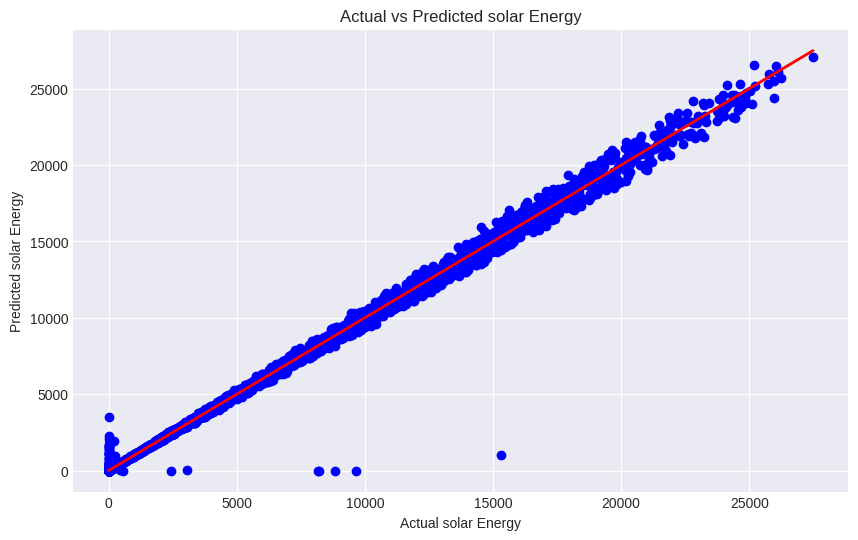

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(solar_y_test, y_pred, color='blue')
plt.plot([min(solar_y_test), max(solar_y_test)], [min(solar_y_test), max(solar_y_test)], color='red', linewidth=2)
plt.xlabel('Actual solar Energy')
plt.ylabel('Predicted solar Energy')
plt.title('Actual vs Predicted solar Energy')
plt.show()


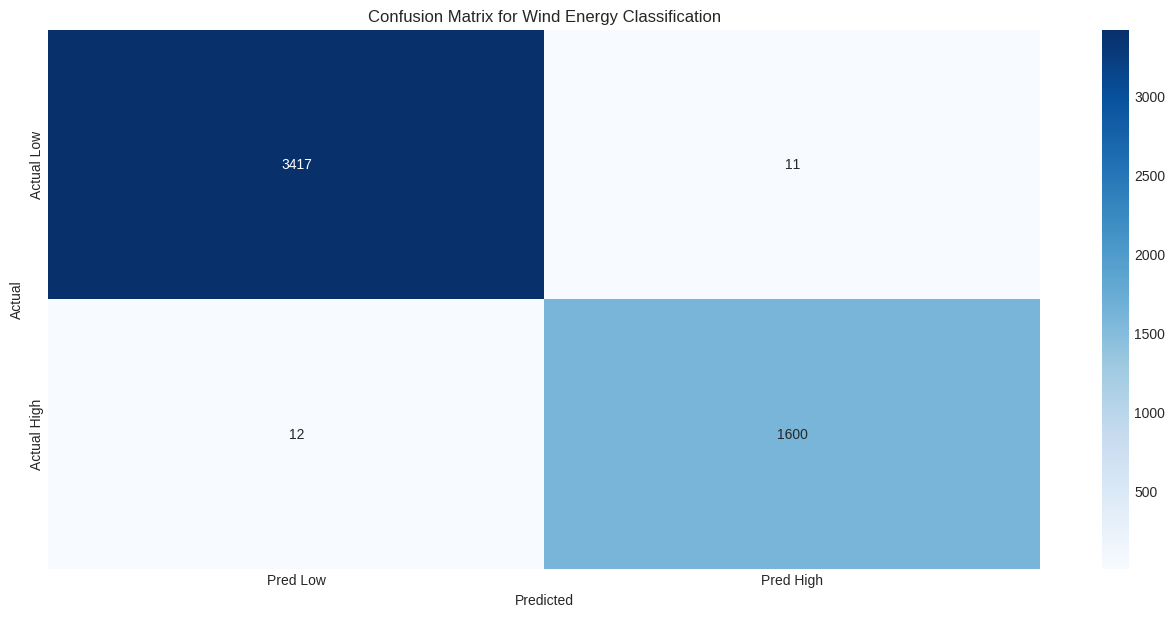

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = solar_y_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y1_test_class = np.where(solar_y_test >= threshold, 1, 0)
y1_pred_class = np.where(y_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y1_test_class, y1_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Wind Energy Classification')
plt.show()


In [ ]:
df_wind_x=df[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=df['DE_wind_generation_actual']

In [ ]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(wind_y_test, y_pred))

Mean Absolute Error: 8616.756847749062
Mean Squared Error: 123409676.89384334
Root Mean Squared Error: 11108.990813473712
R square score: 0.997750215528461


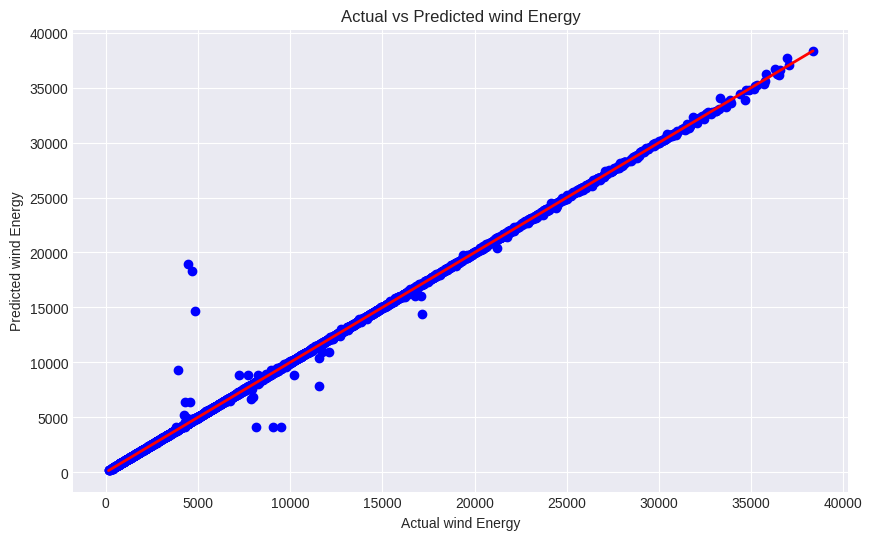

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(wind_y_test, y_pred, color='blue')
plt.plot([min(wind_y_test), max(wind_y_test)], [min(wind_y_test), max(wind_y_test)], color='red', linewidth=2)
plt.xlabel('Actual wind Energy')
plt.ylabel('Predicted wind Energy')
plt.title('Actual vs Predicted wind Energy')
plt.show()

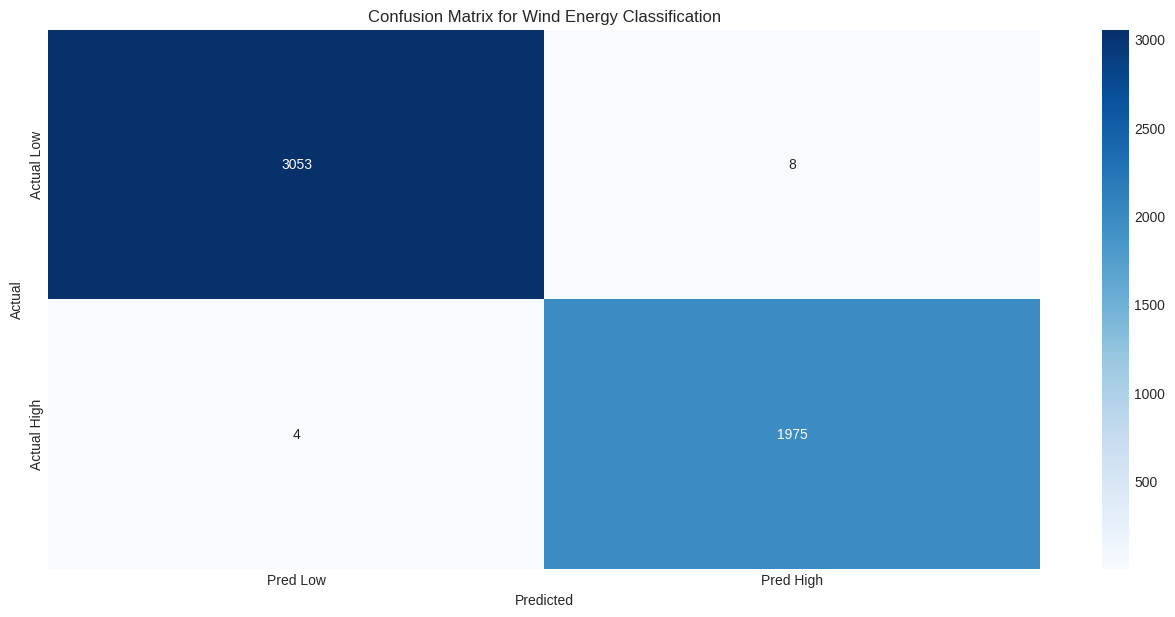

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold to convert continuous predictions into binary classification
# For example, classify predictions as 1 if they are above a threshold, otherwise 0
threshold = wind_y_test.mean()  # You can set your own threshold based on the mean, median, or any other logic
y2_test_class = np.where(wind_y_test >= threshold, 1, 0)
y2_pred_class = np.where(y_pred >= threshold, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y2_test_class, y2_pred_class)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred Low', 'Pred High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Wind Energy Classification')
plt.show()


#LSTM

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [ ]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [ ]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [ ]:

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled


In [ ]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [ ]:

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [ ]:

df=df.dropna()

In [ ]:
df_solar=df[['DE_solar_profile']]

In [ ]:

# transform data to be stationary
raw_values = df_solar.values
diff_values = difference(raw_values, 1)

In [ ]:
# transform data to be stationary
raw_values = df_solar.values
diff_values = difference(raw_values, 1)

In [ ]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values


In [ ]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [ ]:

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
def fit_lstm(train_scaled, batch_size, epochs, neurons):
    X, y = train_scaled[:, 0:-1], train_scaled[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])  # Reshape into [samples, timesteps, features]

    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X.shape[1], X.shape[2])))  # Correct input_shape
    model.add(Dense(1))  # Output layer with 1 neuron

    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=2)

    return model


lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

Epoch 1/15
24199/24199 - 51s - 2ms/step - loss: 0.0030
Epoch 2/15
24199/24199 - 44s - 2ms/step - loss: 0.0020
Epoch 3/15
24199/24199 - 45s - 2ms/step - loss: 0.0019
Epoch 4/15
24199/24199 - 83s - 3ms/step - loss: 0.0018
Epoch 5/15
24199/24199 - 48s - 2ms/step - loss: 0.0017
Epoch 6/15
24199/24199 - 44s - 2ms/step - loss: 0.0016
Epoch 7/15
24199/24199 - 46s - 2ms/step - loss: 0.0016
Epoch 8/15
24199/24199 - 82s - 3ms/step - loss: 0.0015
Epoch 9/15
24199/24199 - 82s - 3ms/step - loss: 0.0015
Epoch 10/15
24199/24199 - 46s - 2ms/step - loss: 0.0015
Epoch 11/15
24199/24199 - 45s - 2ms/step - loss: 0.0014
Epoch 12/15
24199/24199 - 44s - 2ms/step - loss: 0.0014
Epoch 13/15
24199/24199 - 47s - 2ms/step - loss: 0.0014
Epoch 14/15
24199/24199 - 80s - 3ms/step - loss: 0.0014
Epoch 15/15
24199/24199 - 43s - 2ms/step - loss: 0.0014


In [ ]:
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()

for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)  # batch_size_exp set to 1

    # Replacing value in test_pred with the predicted value
    test_pred = [yhat] + test_pred
    if len(test_pred) > lag_exp + 1:
        test_pred = test_pred[:-1]

    # If there's a next row, update it
    if i + 1 < len(test_scaled):
        if i + 1 > lag_exp + 1:
            test_scaled[i + 1] = test_pred
        else:
            # Update only the part of the next row
            test_scaled[i + 1] = np.concatenate((test_pred, test_scaled[i + 1, len(test_pred):]), axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled) + 1 - i)

    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)

    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)

    print(f'Hour={i+1}, Predicted={yhat}, Expected={expected}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Hour=1, Predicted=[0.10065211], Expected=[0.106]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Hour=2, Predicted=[0.17685598], Expected=[0.1744]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Hour=3, Predicted=[0.23233911], Expected=[0.2321]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Hour=4, Predicted=[0.26418672], Expected=[0.2679]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Hour=5, Predicted=[0.27090442], Expected=[0.2613]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Hour=6, Predicted=[0.24054776], Expected=[0.2334]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Hour=7, Predicted=[0.19259967], Expected=[0.204]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Hour=8, Predicted=[0.14235189], Expected=[0.1274]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Hour=9, Predicted=[0.05558384], Expected=[0.0486]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Hour=10, Predicted=[-0.00515713], Expected=[0.0061]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Hour=11, Predicted=[-0.00755929], Expected=[0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/

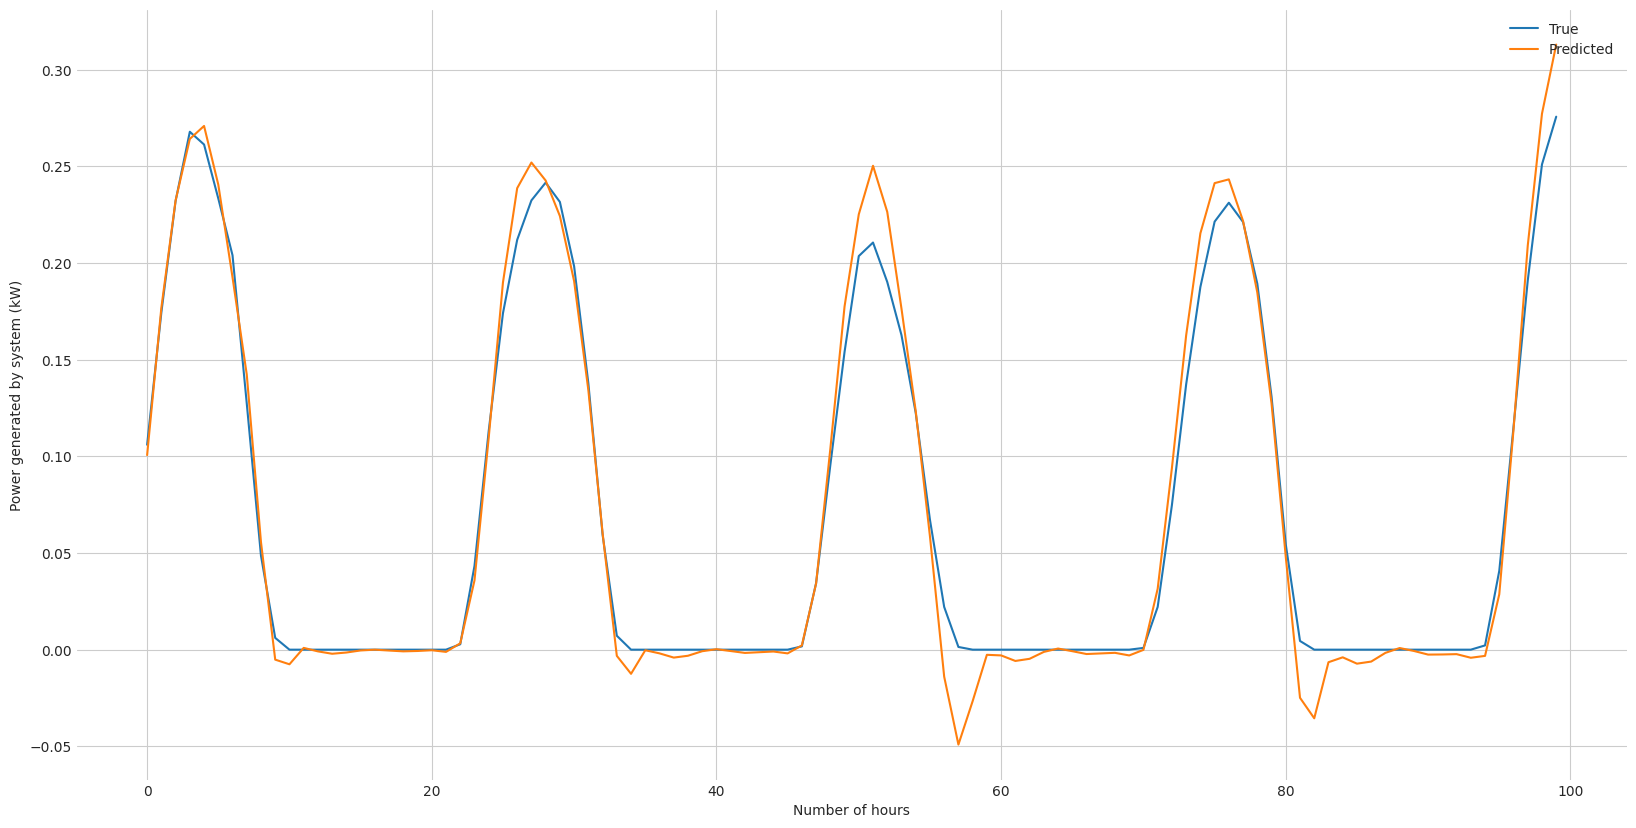

In [ ]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()

In [ ]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.sum(np.mean(np.abs((expectations - predictions) / expectations)))))
print("Mean squared Error: ", (np.sum(np.mean(np.abs((expectations - predictions)**2 / expectations)))))
residual=abs(expectations-predictions)
ssr=np.sum(residual**2)
mean=np.mean(expectations)
sst=np.sum((expectations-mean)**2)
print("R squared score",(1-(ssr/sst)))